In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
data = pd.read_csv("./spam.csv", encoding = "latin-1")

In [63]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [64]:
data_train, \
data_test, \
label_train, \
label_test = train_test_split(data.v2, data.v1, test_size = 0.2, 
                              random_state = 0)

In [90]:
label_train.values

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [79]:
label_train[:10]

1114     ham
3589     ham
3095     ham
1012     ham
3320     ham
4130     ham
1197     ham
5426     ham
624      ham
2260    spam
Name: v1, dtype: object

In [83]:
data_train[:10]

1114    No no:)this is kallis home ground.amla home to...
3589    I am in escape theatre now. . Going to watch K...
3095    We walked from my moms. Right on stagwood pass...
1012       I dunno they close oredi not... ÌÏ v ma fan...
3320                               Yo im right by yo work
4130    \Its Ur luck to Love someone. Its Ur fortune t...
1197     He also knows about lunch menu only da. . I know
5426        Oh yeah! And my diet just flew out the window
624     Nah it's straight, if you can just bring bud o...
2260    SplashMobile: Choose from 1000s of gr8 tones e...
Name: v2, dtype: object

In [80]:
type(label_train)

pandas.core.series.Series

In [129]:
class MyNaiveBayes():
    
    def __int__(self,
               p_each_word_spam = None,
               p_each_word_ham = None,
               p_spam = None,
               p_ham = None,
               word_set = None):
         self.p_each_word_spam = p_each_word_spam
         self.p_each_word_ham  = p_each_word_ham
         self.p_spam           = p_spam
         self.p_ham            = p_ham
         word_set              = word_set
            
    # find all the unique words in the data(dataframw/matrix)
    def getVocabularyFromDataframe(self, data) :
        wordset = set([])

        for document in data:
            words = document.split()
            for word in words:
                wordset.add(word)
        return list(wordset)
    
    # convert a string to a word vector
    def documentToWordVector(self, word_set, doc):
        vect = np.zeros(len(word_set))

        words = doc.split()

        for word in words:
            if word in word_set:
                vect[word_set.index(word)] += 1
        return vect
    
    #convert all the rows in the data to word vectors
    def getWordMatrix(self, data):
        word_matrix = []
        for document in data.values:
            word_vector = documentToWordVector(word_set, document)
            word_matrix.append(word_vector)
        return word_matrix

    # get the p(eachword|spam), p(eachword|ham), p(spam) and p(ham)
    def fit(self, data_train, label_train):
        
        # get the entire vocabulary of the training data
        word_set = getVocabularyFromDataframe(data_train)
        train_matrix = self.getWordMatrix(data_train)

        num_docs = len(train_matrix)
        num_words = len(word_set)
        
        print("num_docs = " + str(num_docs))
        print("num_words = " + str(num_docs))
        
        #laplace smoothing: numerator + 1, denominator + n
        # number of appearance of each word in spam emails
        vect_word_count_in_spams = np.ones(num_words)
        vect_word_count_in_hams  = np.ones(num_words)
        
        # size of the vocabulary
        spam_total_num_words = num_words
        ham_total_num_words  = num_words

        spam_emails_count = 0
        ham_emails_count  = 0

        # label_train's index is messed after split
        # there maybe data missing 
        # so better not to use label_train[i]
        # but use label_train.values
        for i in range(num_docs):
            if label_train.values[i] == "spam":
                # python can add items by vector directly
                vect_word_count_in_spams += train_matrix[i]
                spam_total_num_words += sum(train_matrix[i])
                spam_emails_count += 1
            else:
                vect_word_count_in_hams   += train_matrix[i]
                ham_total_num_words += sum(train_matrix[i])
                spam_emails_count   += 1

        self.p_each_word_spam = np.log(vect_word_count_in_spams/spam_total_num_words)
        self.p_each_word_ham = np.log(vect_word_count_in_hams/ham_total_num_words)

        self.p_spam = np.log(spam_emails_count/num_docs)
        self.p_ham = np.log(spam_emails_count/num_docs)

    def predict(self, data_test):
        test_vector_matrix = self.getWordMatrix(data_test)
        result_spam = np.matmul(test_vector_matrix, self.p_each_word_spam.transpose()) + self.p_spam.transpose()
        result_ham  = np.matmul(test_vector_matrix, self.p_each_word_ham.transpose())  + self.p_ham.transpose()
        result = result_spam - result_ham
        vect_func = np.vectorize(lambda x:"spam" if x > 0 else "ham")
        result = vect_func(result)
        return result

In [130]:
model = MyNaiveBayes()
model.fit(data_train, label_train)

num_docs = 4457
num_words = 4457


In [131]:
model.p_each_word_spam

array([ -8.83590144, -10.2221958 , -10.2221958 , ...,  -9.52904862,
       -10.2221958 , -10.2221958 ])

In [132]:
predictions = model.predict(data_test)

In [133]:
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

(array([948.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 167.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

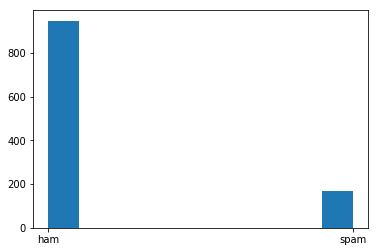

In [134]:
plt.hist(predictions)

In [135]:
len(predictions)

1115

In [136]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

print(accuracy_score(label_test, predictions))
print(classification_report(label_test, predictions))
print(confusion_matrix(label_test, predictions))

0.9668161434977578
             precision    recall  f1-score   support

        ham       0.98      0.98      0.98       949
       spam       0.89      0.89      0.89       166

avg / total       0.97      0.97      0.97      1115

[[930  19]
 [ 18 148]]
